In [1]:
import statsmodels.stats.api as sms
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
bank=pd.read_csv("hmelq.csv")
bank.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [3]:
grps=pd.unique(bank.bad.values)
print(grps)

[0 1]


In [5]:
len(bank["loan"])

3576

bad: 
 


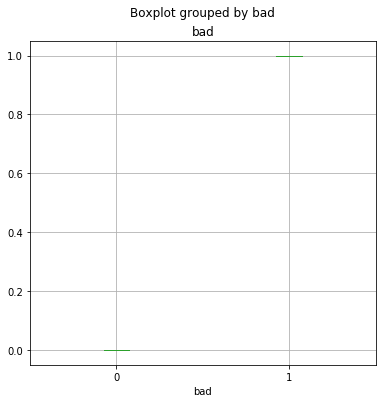

 
loan: 
 


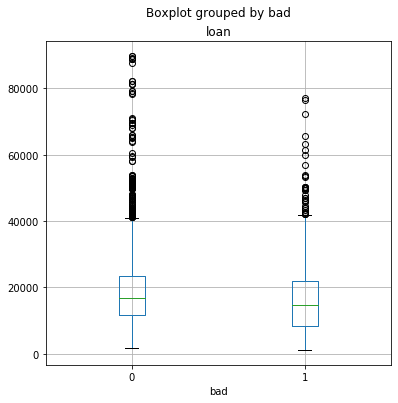

 
mortdue: 
 


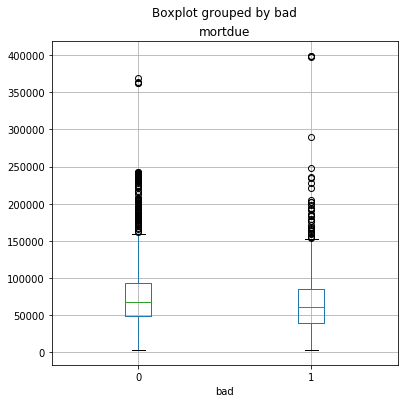

 
value: 
 


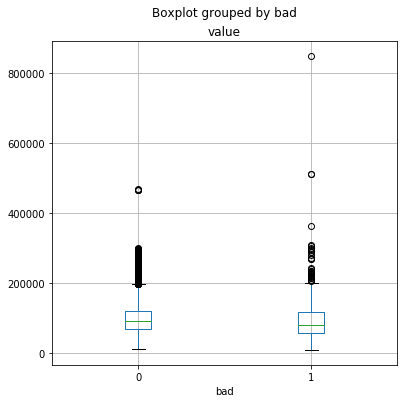

 
yoj: 
 


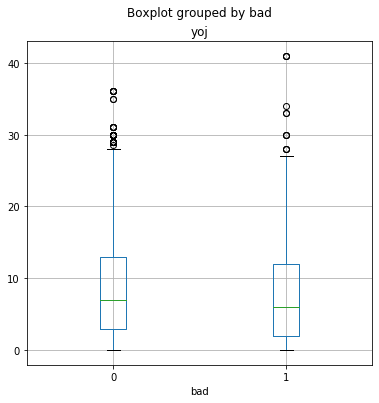

 
derog: 
 


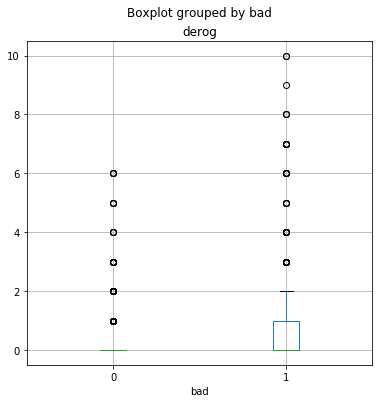

 
delinq: 
 


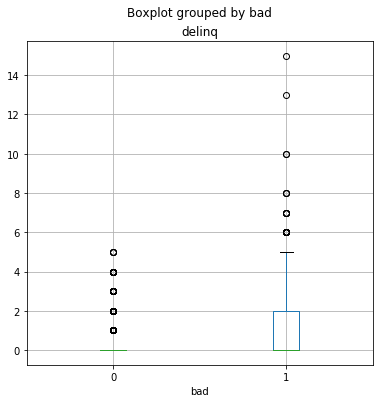

 
clage: 
 


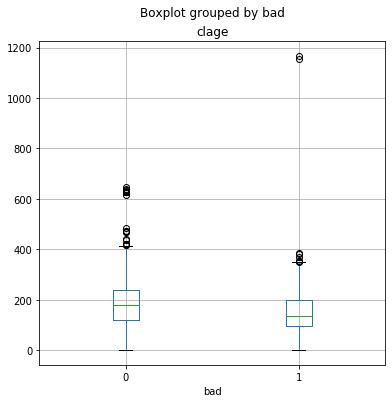

 
ninq: 
 


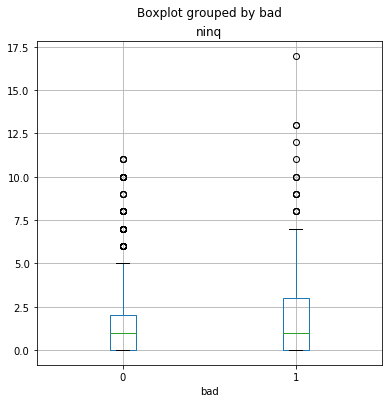

 
clno: 
 


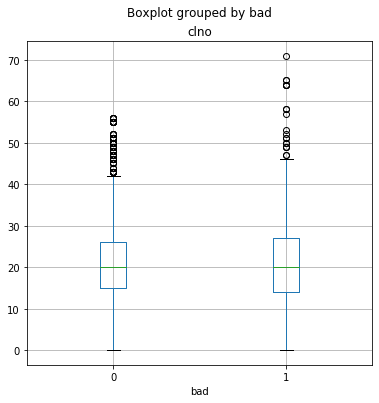

In [8]:
newcolumns=bank.columns.drop(['reason','job']) #boxplotlara ve Shapiro testlere kategorikleri almıyorum
df=pd.DataFrame(bank[newcolumns])

for category in df.columns[:-1]:
    print (category+": ")
    print (" ")
    df.boxplot(column=category, by="bad",figsize=(6,6))
    plt.show()
    print (" ")


In [9]:
MissingData=df.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') #  isnull() NaN varsa 1 dönüyor
MissingData 

,Variables,Missing Values
0,bad,0
1,loan,0
2,mortdue,314
3,value,64
4,yoj,312
5,derog,427
6,delinq,351
7,clage,179
8,ninq,303
9,clno,133


In [10]:
df.dropna(axis=0, how='any', inplace=True) #üstüne tekrar bakıp emin oluyorum
MissingData=df.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values') #  isnull() NaN varsa 1 dönüyor
MissingData 

,Variables,Missing Values
0,bad,0
1,loan,0
2,mortdue,0
3,value,0
4,yoj,0
5,derog,0
6,delinq,0
7,clage,0
8,ninq,0
9,clno,0


In [11]:
df.shape

(2105, 11)

In [12]:
corr=bank[newcolumns].corr() #correlation bakıyorum.
corr.style.background_gradient(cmap='coolwarm')

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
bad,1,-0.0715234,-0.0562264,-0.0502544,-0.0515325,0.27098,0.345548,-0.150367,0.174759,-0.0089814,0.236738
loan,-0.0715234,1,0.229546,0.337453,0.123293,-0.00146278,-0.0215769,0.0890303,0.0486332,0.092377,0.0936357
mortdue,-0.0562264,0.229546,1,0.87328,-0.0899486,-0.0533096,-0.00497061,0.141236,0.029452,0.340139,0.167358
value,-0.0502544,0.337453,0.87328,1,0.00250113,-0.057279,-0.011014,0.182226,-0.00519074,0.290439,0.134187
yoj,-0.0515325,0.123293,-0.0899486,0.00250113,1,-0.0734999,0.0654005,0.184283,-0.0677348,0.0178093,-0.0522897
derog,0.27098,-0.00146278,-0.0533096,-0.057279,-0.0734999,1,0.234706,-0.0837549,0.16375,0.0486305,0.032324
delinq,0.345548,-0.0215769,-0.00497061,-0.011014,0.0654005,0.234706,1,0.044245,0.0811657,0.151996,0.0769433
clage,-0.150367,0.0890303,0.141236,0.182226,0.184283,-0.0837549,0.044245,1,-0.113367,0.221071,-0.0428518
ninq,0.174759,0.0486332,0.029452,-0.00519074,-0.0677348,0.16375,0.0811657,-0.113367,1,0.0976694,0.133751
clno,-0.0089814,0.092377,0.340139,0.290439,0.0178093,0.0486305,0.151996,0.221071,0.0976694,1,0.180983


Correlation tablosunda şüphelendiğim variablelar derog, delinw, debtinc. Belki ninq ve clage da bakılabilir.

In [13]:
print(df.describe(include='all'))

               bad          loan        mortdue          value          yoj  \
count  2105.000000   2105.000000    2105.000000    2105.000000  2105.000000   
mean      0.085986  19077.102138   75784.857482  106420.376247     9.067458   
std       0.280410  11290.210696   44167.439836   53542.862457     7.633427   
min       0.000000   1700.000000    5076.000000   23031.000000     0.000000   
25%       0.000000  11900.000000   49264.000000   71167.000000     3.000000   
50%       0.000000  16800.000000   67222.000000   94267.000000     7.000000   
75%       0.000000  23500.000000   92572.000000  121216.000000    13.000000   
max       1.000000  89900.000000  399412.000000  512650.000000    41.000000   

             derog       delinq        clage         ninq         clno  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.147743     0.255107   180.717558     1.019477    22.061758   
std       0.571442     0.775703    84.131623     1.560595     9.40

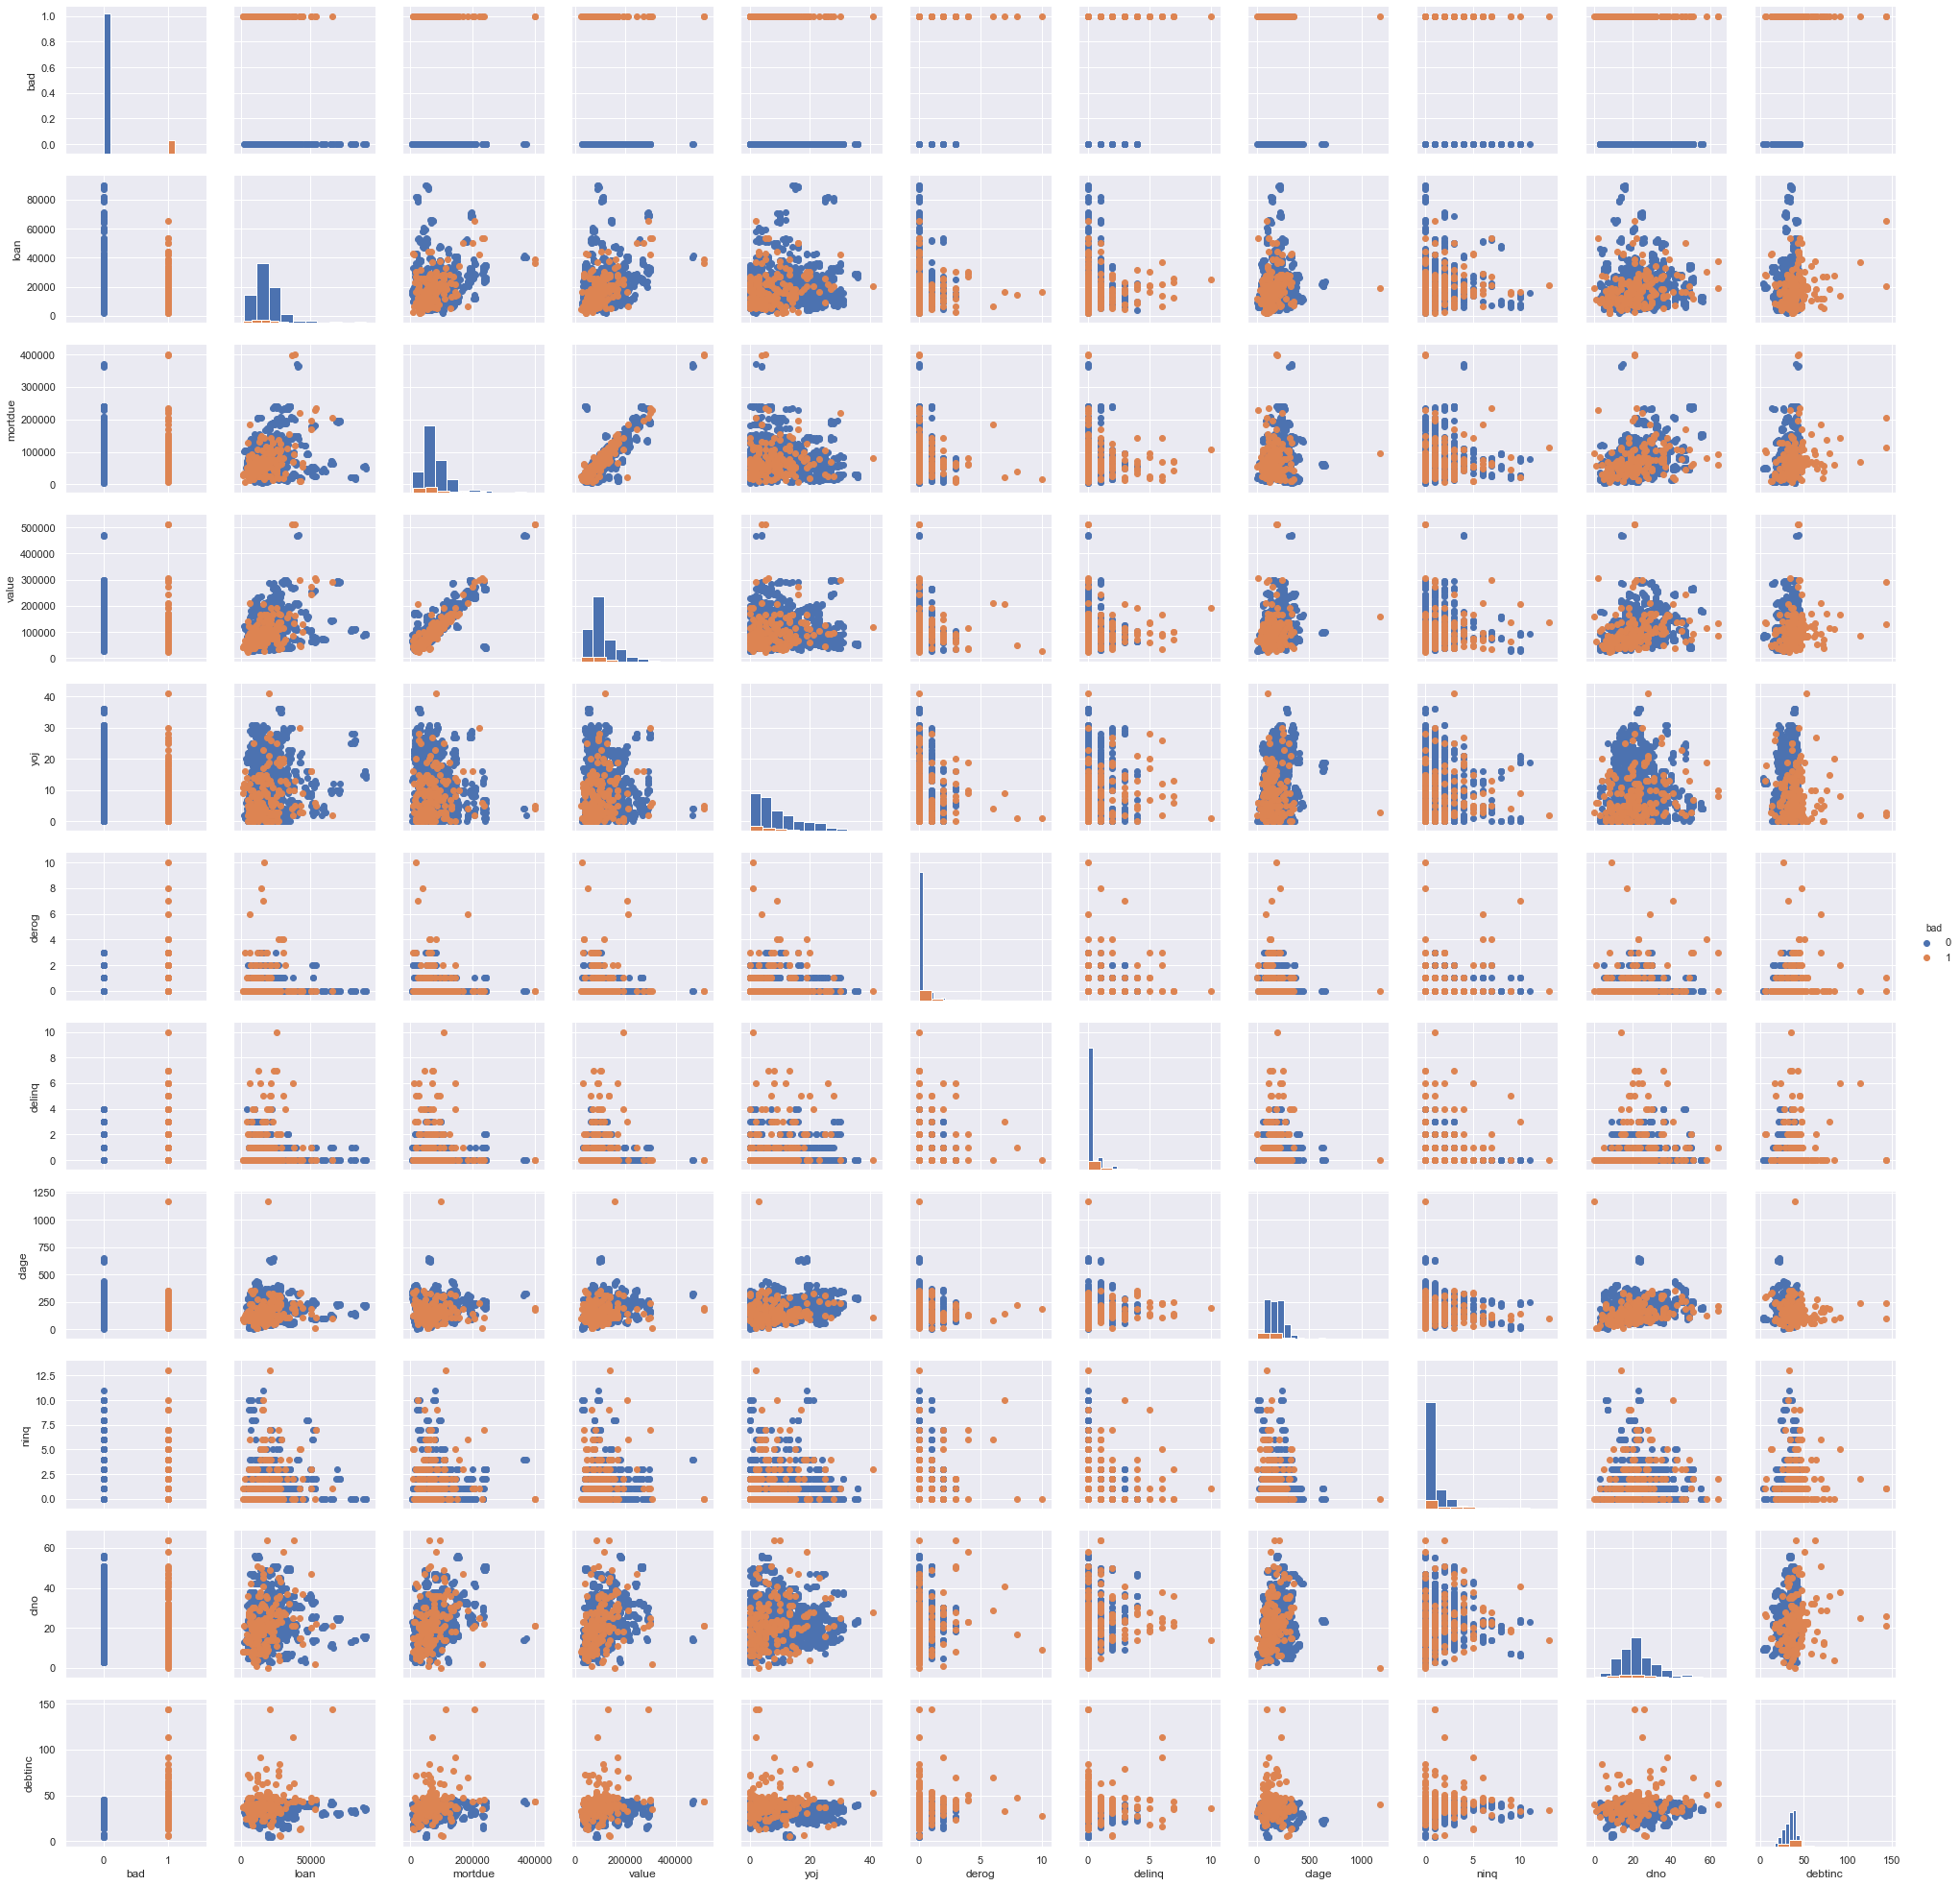

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

g = sns.PairGrid(df, hue="bad")
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [15]:
from scipy.stats import shapiro #continuous olmayan variablelar da araya girmiş bulundu

for category in df.columns[:-1]:
    print (category+" : ")

    for name in grps:
        print(name,  shapiro(df[category][df['bad'] == name]))
    print (" ")

bad : 
0 (1.0, 1.0)
1 (1.0, 1.0)
 
loan : 
0 (0.7956977486610413, 5.885453550164232e-44)
1 (0.9045296311378479, 2.0234531827867386e-09)
 
mortdue : 
0 (0.8787813186645508, 2.5453777214467308e-36)
1 (0.7512526512145996, 3.3890862892696385e-16)
 
value : 
0 (0.8589469194412231, 1.8442751131791746e-38)
1 (0.7333866357803345, 9.111328934567086e-17)
 
yoj : 
0 (0.9125788807868958, 6.363385853910847e-32)
1 (0.8766403794288635, 4.9340385943619225e-11)
 
derog : 
0 (0.30066293478012085, 0.0)
1 (0.4721530079841614, 5.81210879296985e-23)
 
delinq : 
0 (0.38343751430511475, 0.0)
1 (0.6147846579551697, 5.649246795537095e-20)
 
clage : 
0 (0.9353772401809692, 4.026925717013056e-28)
1 (0.6687158942222595, 1.2689307318202608e-18)
 
ninq : 
0 (0.664009153842926, 0.0)
1 (0.7351685762405396, 1.0356499792510919e-16)
 
clno : 
0 (0.963139533996582, 9.86331293319224e-22)
1 (0.9458193778991699, 2.26503107114695e-06)
 


C:\Users\pinra_000\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1650: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [17]:
from scipy.stats import levene

arrr=['derog', 'delinq', 'debtinc',  'ninq'] #levene testini adaylarım için yapıyorum
for i in arrr:
    print(i +" için:"+str(levene(df[i][df['bad']==0], df[i][df['bad']==1])))

derog için:LeveneResult(statistic=119.76642995326307, pvalue=3.782961336911596e-27)
delinq için:LeveneResult(statistic=177.9437600150609, pvalue=5.011836866349701e-39)
debtinc için:LeveneResult(statistic=127.680234966471, pvalue=8.748739427071007e-29)
ninq için:LeveneResult(statistic=20.675290268892137, pvalue=5.750707693245181e-06)


In [18]:
from scipy import stats

for i in arrr:
    print(i +" için:"+str(stats.ttest_ind(df[i], df.bad))) #aynı değişkenler için t-test yapıyorum

derog için:Ttest_indResult(statistic=4.451393023410822, pvalue=8.752382032236644e-06)
delinq için:Ttest_indResult(statistic=9.40718331310139, pvalue=8.147188471762126e-21)
debtinc için:Ttest_indResult(statistic=185.5364842775458, pvalue=0.0)
ninq için:Ttest_indResult(statistic=27.0113565887868, pvalue=2.511274132396237e-148)


In [19]:

reasonss=pd.crosstab(index=bank['bad'],columns=bank['reason'])
reasonss.index = ["good","bad"]
reasonss   #crosstab for reason, tek bir dummy variable olabilir.

reason,DebtCon,HomeImp
good,1931,814
bad,440,244


In [20]:

jobb=pd.crosstab(index=bank['bad'],columns=bank['job'])
jobb.index = ["good","bad"]
jobb #crosstab for job, 5 dummy variable olabilir.

job,Mgr,Office,Other,ProfEx,Sales,Self
good,354,494,1099,639,43,81
bad,107,75,332,128,23,34


In [21]:
df.describe(include='all').T #kategorikler dropped

,count,mean,std,min,25%,50%,75%,max
bad,2105.0,0.085986,0.280410,0.00,0.00,0.000,0.000,1.000
loan,2105.0,19077.102138,11290.210696,1700.00,11900.00,16800.000,23500.000,89900.000
mortdue,2105.0,75784.857482,44167.439836,5076.00,49264.00,67222.000,92572.000,399412.000
value,2105.0,106420.376247,53542.862457,23031.00,71167.00,94267.000,121216.000,512650.000
yoj,2105.0,9.067458,7.633427,0.00,3.00,7.000,13.000,41.000
derog,2105.0,0.147743,0.571442,0.00,0.00,0.000,0.000,10.000
delinq,2105.0,0.255107,0.775703,0.00,0.00,0.000,0.000,10.000
clage,2105.0,180.717558,84.131623,0.49,118.15,176.330,229.520,1168.230
ninq,2105.0,1.019477,1.560595,0.00,0.00,0.000,2.000,13.000
clno,2105.0,22.061758,9.406685,0.00,16.00,21.000,27.000,64.000
